# Projet spam filter

ANALYSE DES DONNEES

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
#ouverture du fichier csv
df = pd.read_csv('spam.csv',encoding='latin-1')

In [120]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [121]:
df.nunique(axis=0)# returns the number of unique values for each variable.

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

In [122]:
#NETTOYAGE DES DONNEES
dfn = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
dfn = dfn.rename(columns={'v1':'label', 'v2':'sms'})
dfn

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [123]:
#compter le nombre de spam/ham
dfn.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [124]:
dfn.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [125]:
#compter la longueur des s
dfn['length'] = dfn['sms'].apply(len)
dfn.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


VISUALISATION DES DONNEES

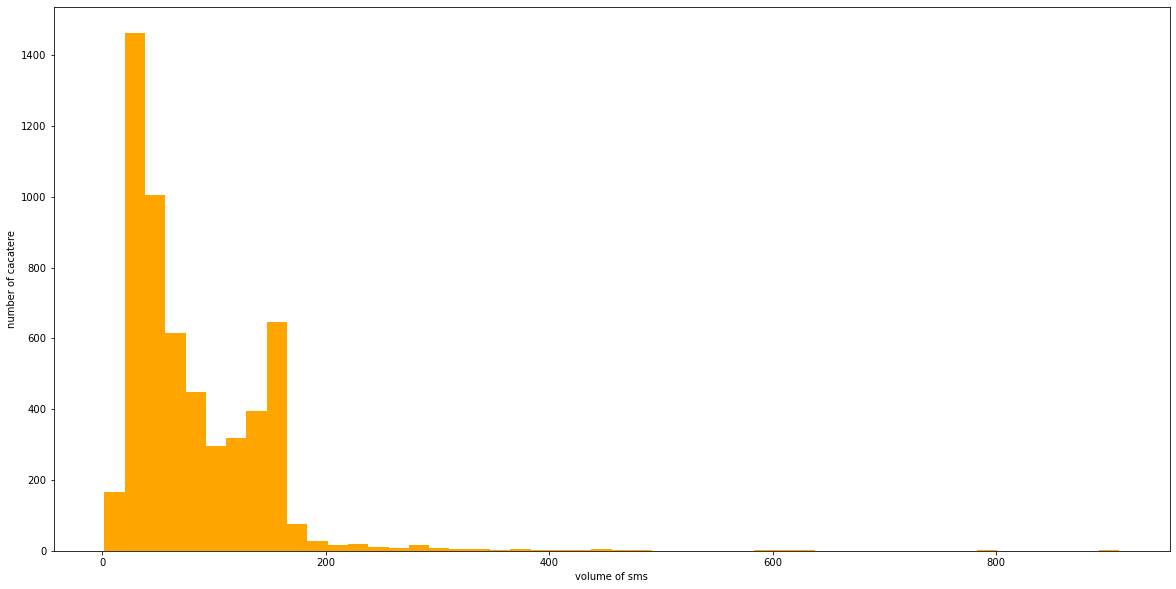

In [126]:
#length of sms visualisaion with histogram
dfn['length'].plot(bins=50, kind='hist', color='orange')
plt.ylabel('number of cacatere')
plt.xlabel('volume of sms')
plt.show()


RECHERCHE DES FEATURES

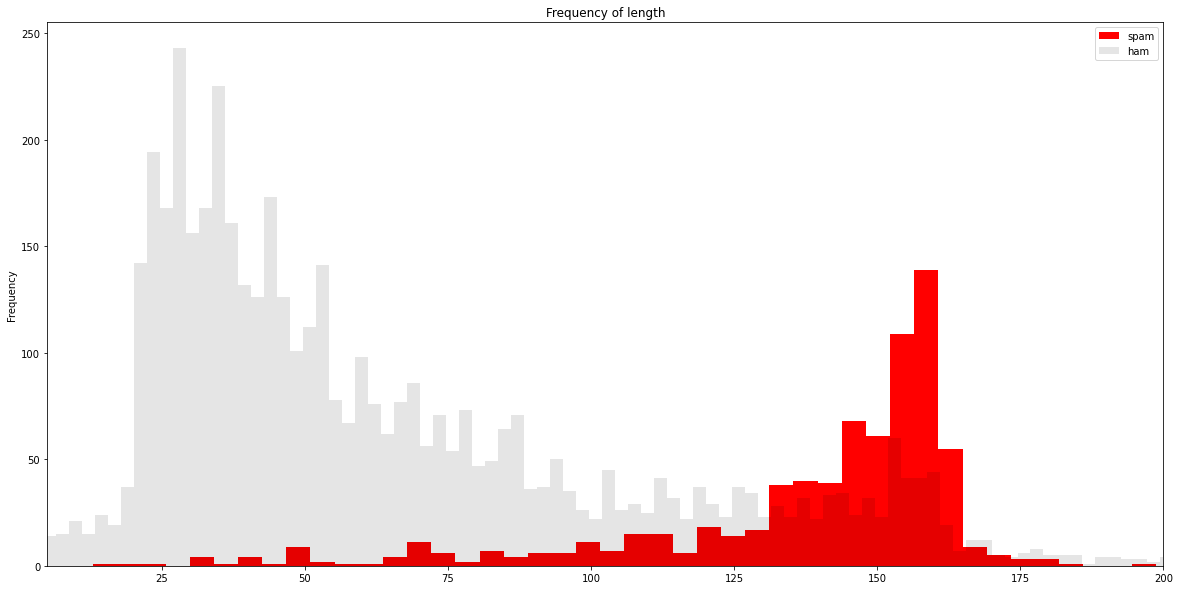

In [127]:
#Histrogram par SPAM OU HAM
x1 = dfn['length'].loc[dfn.label=='spam']
x2 = dfn['length'].loc[dfn.label=='ham']
kwargs = dict(alpha=1, bins=50)
kwargs2 = dict(alpha=0.1, bins=400)

plt.hist(x1, **kwargs, color='r', label='spam')
plt.hist(x2, **kwargs2, color='black', label='ham')

plt.gca().set(title='Frequency of length', ylabel='Frequency')
plt.xlim(5,200)
plt.legend();

In [128]:

import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

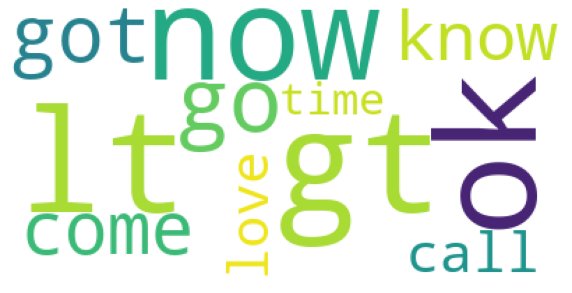

There are 695025 words in the combination of all HAM.


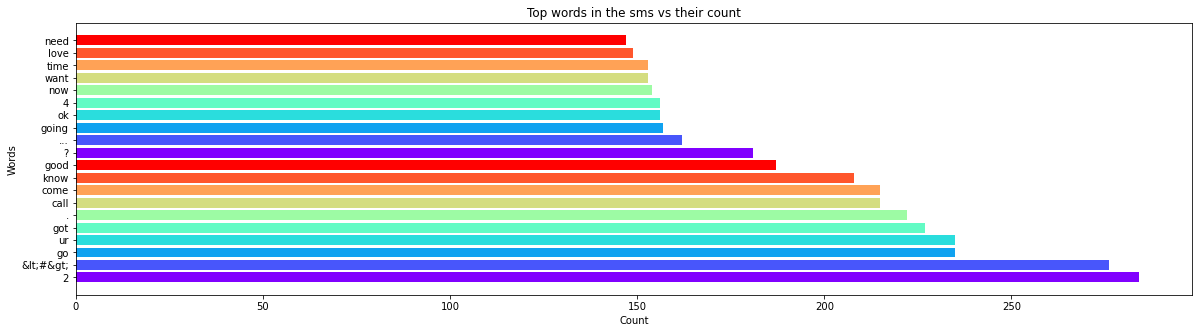

In [153]:
#selection de la colonne ham et transformation en minuscule
spam = dfn['sms'].loc[dfn.label=='ham']
all_sms2 = ' '.join(spam.str.lower())

#----------------------------------------------------------------------------------------------------
#definition des stopword
stopwords = STOPWORDS
stopwords.add('will')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=10).generate(all_sms2)
rcParams['figure.figsize'] = 10, 10
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#------------------------------------------------------------------------------------------------------
#We can even verify the top words using the bar charts.
filtered_words = [word for word in all_sms2.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 5


plt.title('Top words in the sms vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
#-----------------------------------------------------
text = " ".join(review for review in all_sms2)
print ("There are {} words in the combination of all HAM.".format(len(text)))

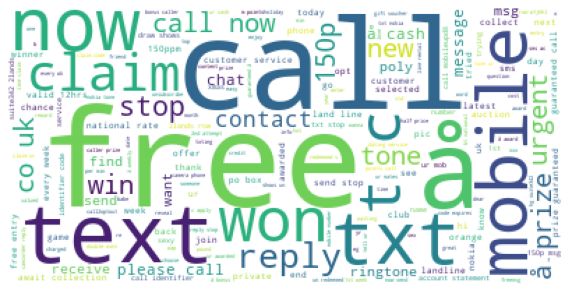

There are 208957 words in the combination of all SPAM.


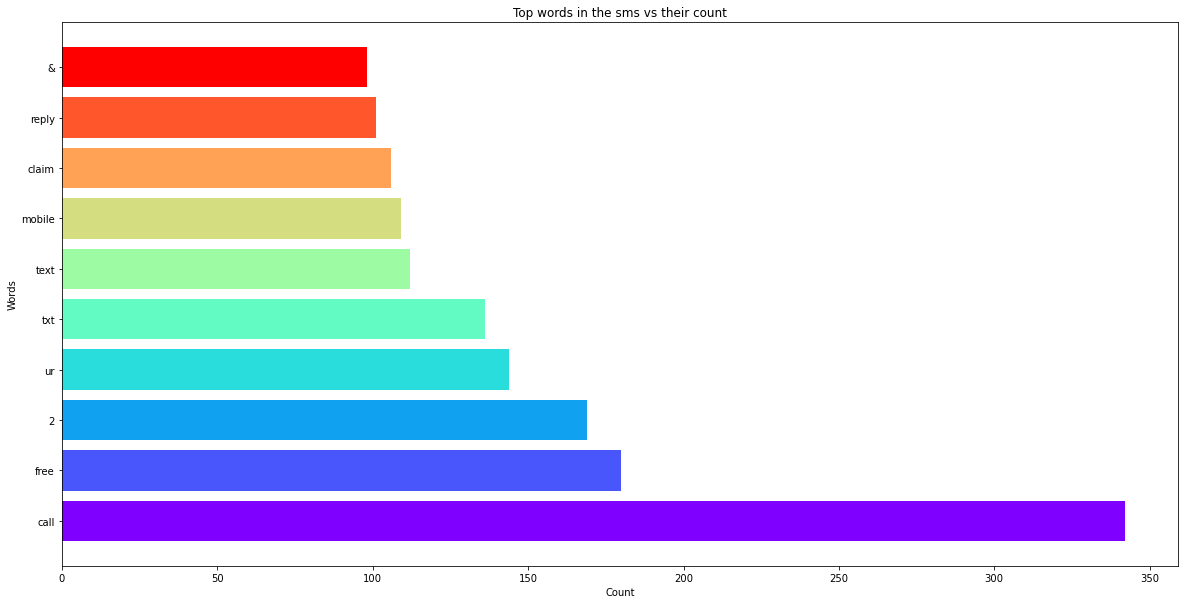

In [147]:
#selection de la colonne ham et transformation en minuscule
spam = dfn['sms'].loc[dfn.label=='spam']
all_sms1 = ' '.join(spam.str.lower())

#----------------------------------------------------------------------------------------------------
#definition des stopword
stopwords = STOPWORDS
stopwords.add('u')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_sms1)
rcParams['figure.figsize'] = 10, 10
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#------------------------------------------------------------------------------------------------------
#We can even verify the top words using the bar charts.
#creation de la boucle
filtered_words = [word for word in all_sms1.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

#creation du graph    
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10


plt.title('Top words in the sms vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
#-----------------------------------------------------
text = " ".join(review for review in all_sms1)
print ("There are {} words in the combination of all SPAM.".format(len(text)))

In [131]:

#create the wordcloud object
#wordcloud = WordCloud(stopwords = STOPWORDS,
                     # collocations=True).generate(all_sms1)

#plot the wordcloud object
#plt.imshow(wordcloud, interpolation='bilInear')
#plt.axis('off')
#plt.show()


# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(all_sms1)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:10])
print(list(rel_freq.items())[:10])


[('free', 200), ('call', 170), ('å', 129), ('text', 126), ('txt', 100), ('now', 100), ('mobile', 94), ('won', 73), ('t c', 66), ('claim', 63)]
[('free', 1.0), ('call', 0.85), ('å', 0.645), ('text', 0.63), ('txt', 0.5), ('now', 0.5), ('mobile', 0.47), ('won', 0.365), ('t c', 0.33), ('claim', 0.315)]


In [132]:
#find url

In [144]:
def get_url(txt):
    url_list = re.findall( r'(https?://\S+)', txt)
    return url_list   

In [145]:
l = get_url(all_sms1)
print(f"url={l}")
print(len(l))


url=['http://wap.', 'http://img.', 'http://www.bubbletext.com', 'http://www.e-tlp.co.uk/expressoffer', 'http://www.e-tlp.co.uk/expressoffer', 'http://doit.', 'http://www.urawinner.com', 'http://www.urawinner.com', 'http://gotbabes.co.uk.', 'http://www.e-tlp.co.uk/reward.', 'http://careers.', 'http://careers.', 'http://tms.', 'http://alto18.co.uk/wave/wave.asp?o=44345', 'http://www.wtlp.co.uk/text.', 'http://www.urawinner.com', 'http://www.urawinner.com', 'http://www.urawinner.com', 'http://www.urawinner.com', 'http://www.vouch4me.com/etlp/dining.asp']
20


In [146]:
l2 = get_url(all_sms2)
print(f"url={l2}")
print(len(l2))

url=[]
0


In [152]:
spam.head(200)

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
1327    Ur balance is now å£500. Ur next question is: ...
1349    FREE2DAY sexy St George's Day pic of Jordan!Tx...
1365    HOT LIVE FANTASIES call now 08707509020 Just 2...
1373    Bears Pic Nick, and Tom, Pete and ... Dick. In...
1374    500 New Mobiles from 2004, MUST GO! Txt: NOKIA...
Name: sms, Length: 200, dtype: object

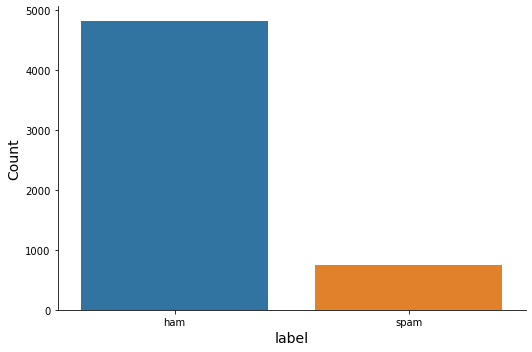

In [182]:
#compter spam et ham
import matplotlib.pyplot as plt
sns.catplot( x='label',
             kind="count", 
             data=dfn,
             height=5,
             aspect=1.5)
plt.xlabel("label", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()
plt.savefig("Countplot_or_barplot_with_Seaborn_catplot.png")
